In [2]:
import pandas as pd
import numpy as np

In [38]:
mpg = pd.read_csv('mpg.csv')

In [39]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [40]:
mpg_new = mpg[['category', 'cty']]
mpg_new.head()

,category,cty
0,compact,18
1,compact,21
2,compact,20
3,compact,21
4,compact,16


In [41]:
# suv의 cty 평균
mpg_new.query('category == "suv"')['cty'].mean()

np.float64(13.5)

In [42]:
# compact의 cty 평균
mpg_new.query('category == "compact"')['cty'].mean()

np.float64(20.127659574468087)

In [43]:
mpg.query('manufacturer == "audi"').sort_values('hwy', ascending=False).head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
9,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact


In [44]:
mpg.query('manufacturer == "audi"') \
    .sort_values('hwy', ascending=False) \
    .head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
9,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact


In [45]:
# 복사본
mpg_new = mpg.copy()

In [46]:
# 합산 연비 컬럼(변수) -> total
mpg_new = mpg_new.assign(total = mpg_new['cty'] + mpg_new['hwy'])

In [47]:
mpg_new.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,47
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,50
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,51
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,51
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,42


In [48]:
# 평균 연비 컬럼(변수) -> mean
mpg_new = mpg_new.assign(mean = mpg_new['total'] / 2)

In [49]:
mpg_new.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,mean
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,47,23.5
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,50,25.0
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,51,25.5
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,51,25.5
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,42,21.0


In [50]:
# 평균 연비 컬럼(변수) -> mean 높은 순서(내림차순 정렬), 상위 3개추출
mpg_new.sort_values('mean', ascending=False).head(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,mean
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact,79,39.5
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact,77,38.5
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact,70,35.0


In [51]:
# def func(x):
#   x['cty'] + x['hwy']

# func(mpg_new)

In [52]:
mpg.assign(total = lambda x: x['cty'] + x['hwy'],
           mean = lambda x: x['total'] / 2) \
           .sort_values('mean', ascending=False) \
           .head(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,mean
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact,79,39.5
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact,77,38.5
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact,70,35.0


In [53]:
# 제조 회사(manufacturer) 및 구동 방식(drv)별 분리
# cty 평균 컬럼명 -> mean_cty
mpg.groupby(['manufacturer', 'drv']) \
    .agg(mean_cty = ('cty', 'mean'))

mean_cty
manufacturer drv           
audi         4    16.818182
             f    18.857143
chevrolet    4    12.500000
             f    18.800000
             r    14.100000
dodge        4    12.000000
             f    15.818182
ford         4    13.307692
             r    14.750000
honda        f    24.444444
hyundai      f    18.642857
jeep         4    13.500000
land rover   4    11.500000
lincoln      r    11.333333
mercury      4    13.250000
nissan       4    13.750000
             f    20.000000
pontiac      f    17.000000
subaru       4    19.285714
toyota       4    14.933333
             f    21.368421
volkswagen   f    20.925926

In [54]:
# 구동방식(drv)별 drv의 개수
mpg.groupby('drv').agg(n = ('drv', 'count')) # 데이터프레임

,n
drv,
4,103
f,106
r,25


In [55]:
# value_counts()로 집단별 빈도 간단하게 구하기
mpg['drv'].value_counts()  # 시리즈

drv
f    106
4    103
r     25
Name: count, dtype: int64

In [56]:
mpg.sample(10)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
214,volkswagen,jetta,2.0,1999,4,auto(l4),f,19,26,r,compact
45,dodge,caravan 2wd,3.8,1999,6,auto(l4),f,15,21,r,minivan
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
100,honda,civic,1.6,1999,4,auto(l4),f,24,32,r,subcompact
128,jeep,grand cherokee 4wd,5.7,2008,8,auto(l5),4,13,18,r,suv
185,toyota,camry,3.5,2008,6,auto(s6),f,19,28,r,midsize
48,dodge,dakota pickup 4wd,3.7,2008,6,manual(m6),4,15,19,r,pickup
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
82,ford,explorer 4wd,5.0,1999,8,auto(l4),4,13,17,r,suv
27,chevrolet,corvette,7.0,2008,8,manual(m6),r,15,24,p,2seater


In [57]:
# 1.suv 추출 -> 2.합산 연비 ->
# 3.회사별로 분리(그룹) -> 4. 합산 연비 평균 ->
# 5.평균 내림차순 -> 6.1~5위
mpg.query('category == "suv"')  \
    .assign(total = mpg['hwy'] + mpg['cty']) \
    .groupby('manufacturer') \
    .agg(mean_tot = ('total', 'mean')) \
    .sort_values('mean_tot', ascending=False) \
    .head()

,mean_tot
manufacturer,
subaru,43.833333
toyota,32.625000
nissan,31.750000
mercury,31.250000
jeep,31.125000


In [58]:
# category별 (그룹) -> cty 평균
mpg.groupby('category') \
    .agg(mean_cty = ('cty', 'mean'))

,mean_cty
category,
2seater,15.400000
compact,20.127660
midsize,18.756098
minivan,15.818182
pickup,13.000000
subcompact,20.371429
suv,13.500000


In [59]:
# category별 (그룹) -> cty 평균 -> 높은 순(내림차순)
mpg.groupby('category') \
    .agg(mean_cty = ('cty', 'mean')) \
    .sort_values('mean_cty', ascending=False)

,mean_cty
category,
subcompact,20.371429
compact,20.127660
midsize,18.756098
minivan,15.818182
2seater,15.400000
suv,13.500000
pickup,13.000000


In [60]:
# 어떤 회사별 (제조회사별) -> hwy(고속도로 연비) 평균 -> 내림차순 -> 1~3
mpg.groupby('manufacturer') \
    .agg(mean_hwy = ('hwy', 'mean')) \
    .sort_values('mean_hwy', ascending=False) \
    .head(3)

,mean_hwy
manufacturer,
honda,32.555556
volkswagen,29.222222
hyundai,26.857143


In [61]:
# 차종(category) 'compact' ->
# 회사별(manufacturer) 그룹 -> 개수 -> 내림차순
mpg.query('category == "compact"') \
    .groupby('manufacturer') \
    .agg(n = ('manufacturer', 'count')) \
    .sort_values('n', ascending=False)

,n
manufacturer,
audi,15
volkswagen,14
toyota,12
subaru,4
nissan,2


In [62]:
mpg.query('category == "compact"') \
    .value_counts('manufacturer')

manufacturer
audi          15
volkswagen    14
toyota        12
subaru         4
nissan         2
Name: count, dtype: int64

In [63]:
# 연료 데이터프레임
fuel = pd.DataFrame({
    'fl': ['c', 'd', 'e', 'p', 'r'],
    'price_fl': [2.35, 2.38, 2.11, 2.76, 2.22]
})
fuel

,fl,price_fl
0,c,2.35
1,d,2.38
2,e,2.11
3,p,2.76
4,r,2.22


In [64]:
mpg = pd.read_csv('mpg.csv')

# mpg에 연료 가격(fuel 데이터프레임)추가
mpg = pd.merge(mpg, fuel, on='fl', how='left')

In [65]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,price_fl
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,2.76
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,2.76
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,2.76
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,2.76
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,2.76


In [66]:
# model, fl, price_fl 추출 5개
mpg[['model', 'fl', 'price_fl']].head()

,model,fl,price_fl
0,a4,p,2.76
1,a4,p,2.76
2,a4,p,2.76
3,a4,p,2.76
4,a4,p,2.76


In [3]:
mpg = pd.read_csv('mpg.csv')

In [4]:
# 64, 123, 130, 152, 211행 'hwy'컬럼 자리에 결측치 대입
mpg.loc[[64, 123, 130, 152, 211], 'hwy'] = np.nan

In [5]:
mpg.loc[[64, 123, 130, 152, 211], :]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
64,dodge,ram 1500 pickup 4wd,4.7,2008,8,manual(m6),4,12,NaN,r,pickup
123,jeep,grand cherokee 4wd,3.7,2008,6,auto(l5),4,15,NaN,r,suv
130,land rover,range rover,4.0,1999,8,auto(l4),4,11,NaN,p,suv
152,nissan,pathfinder 4wd,4.0,2008,6,auto(l5),4,14,NaN,p,suv
211,volkswagen,gti,2.8,1999,6,manual(m5),f,17,NaN,r,compact


In [70]:
# 결측치 빈도 확인 - drv, hwy
mpg[['drv', 'hwy']].isna().sum() # 결측치의 개수 (True는 1)

drv    0
hwy    5
dtype: int64

In [71]:
# hwy 결측치 제거 -> 구동방식별(그룹) -> hwy 평균
mpg.dropna(subset=['hwy']) \
    .groupby('drv') \
    .agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.242424
f,28.200000
r,21.000000


<Axes: ylabel='hwy'>

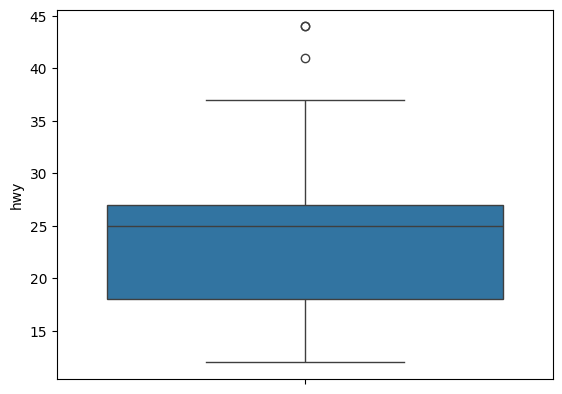

In [6]:
# 상자 그림
import seaborn as sns

sns.boxplot(data=mpg, y='hwy')

In [8]:
# 1사분위수 Q1 하위 25%
pct25 = mpg['hwy'].quantile(.25)
print(pct25)

# 3사분위수 Q3 하위 75%
pct75 = mpg['hwy'].quantile(.75)
print(pct75)

# IQR 
iqr = pct75 - pct25
print(iqr)

18.0
27.0
9.0


In [9]:
# 하한
print(pct25 - 1.5 * iqr)

# 상한
print(pct75 + 1.5 * iqr)

4.5
40.5


In [10]:
# 극단치를 결측 처리
# 4.5 ~ 40.5를 벗어나면 NaN(결측치)
mpg['hwy'] = np.where((mpg['hwy'] < 4.5)|(mpg['hwy'] > 40.5), np.nan, mpg['hwy'])

In [11]:
# 결측치 빈도 확인
mpg['hwy'].isna().sum() 

np.int64(8)

In [12]:
# 결측치 제거 -> drv(구동방식)별 hwy(고속도로 연비) 평균
mpg.dropna(subset=['hwy']).groupby('drv').agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.242424
f,27.764706
r,21.000000


In [ ]:
# 이상치 만들기
mpg = pd.read_csv('mpg.csv')

# drv에 원래 4(사륜구동), f(전륜구동), r(후륜구동)의 구동방식이 존재 -> 이상치 k를 할당
mpg.loc[[9, 13, 57, 92], 'drv'] = 'k'
print(mpg.loc[[9, 13, 57, 92], :]) # 인덱스 9, 13, 57, 92행의 컬럼 전체 확인

# cty 이상치 할당
mpg.loc[[28, 42, 128, 202], 'cty'] = [3, 4, 39, 42] 
print(mpg.loc[[28, 42, 128, 202], :]) 


   manufacturer        model  displ  year  cyl       trans drv  cty  hwy fl  \
9          audi   a4 quattro    2.0  2008    4  manual(m6)   k   20   28  p   
13         audi   a4 quattro    3.1  2008    6    auto(s6)   k   17   25  p   
57        dodge  durango 4wd    3.9  1999    6    auto(l4)   k   13   17  r   
92         ford      mustang    4.0  2008    6  manual(m5)   k   17   26  r   

      category  
9      compact  
13     compact  
57         suv  
92  subcompact  
    manufacturer               model  displ  year  cyl       trans drv  cty  \
28     chevrolet     k1500 tahoe 4wd    5.3  2008    8    auto(l4)   4    3   
42         dodge         caravan 2wd    3.3  2008    6    auto(l4)   f    4   
128         jeep  grand cherokee 4wd    5.7  2008    8    auto(l5)   4   39   
202       toyota   toyota tacoma 4wd    2.7  2008    4  manual(m5)   4   42   

     hwy fl category  
28    19  r      suv  
42    24  r  minivan  
128   18  r      suv  
202   22  r   pickup  


In [ ]:
# drv의 이상치 확인
print(mpg['drv'].value_counts()) # 빈도 많은 순
print(mpg['drv'].value_counts().sort_index()) # 4, f, k, r 순서

drv
f    106
4    100
r     24
k      4
Name: count, dtype: int64
drv
4    100
f    106
k      4
r     24
Name: count, dtype: int64


In [ ]:
# drv가 4, f, r -> 정상, 기존 값 유지 / k -> 결측치(NaN) 부여
mpg['drv'] = np.where(mpg['drv'].isin(['4', 'f', 'r']), mpg['drv'], np.nan) # np.where(mpg['drv'] == 'k', np.nan, mpg['drv'])

# 이상치 확인
mpg['drv'].value_counts()

drv
f    106
4    100
r     24
Name: count, dtype: int64


<Axes: ylabel='cty'>

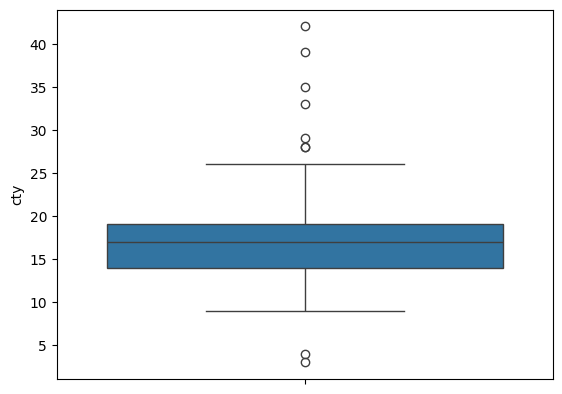

In [ ]:
# import seaborn as sns
# 상자 그림 만들기 -> cty에 이상치가 있는지 확인
sns.boxplot(data=mpg, y='cty')

In [ ]:
# Q1 
pct25 = mpg['cty'].quantile(.25)
print(pct25) # 14

# Q3
pct75 = mpg['cty'].quantile(.75)
print(pct75) # 19

# IQR
iqr = pct75 - pct25
print(iqr) # 5

# 하한
print(pct25 - 1.5 * iqr) # 6.5

# 상한
print(pct75 + 1.5 * iqr) # 26.5

14.0
19.0
5.0
6.5
26.5


In [24]:
# 6.5 ~ 26.5 이 아닌 그 외의 값은 NaN 부여
mpg['cty'] = np.where((mpg['cty'] < 6.5)|(mpg['cty'] > 26.5), np.nan, mpg['cty'])

<Axes: ylabel='cty'>

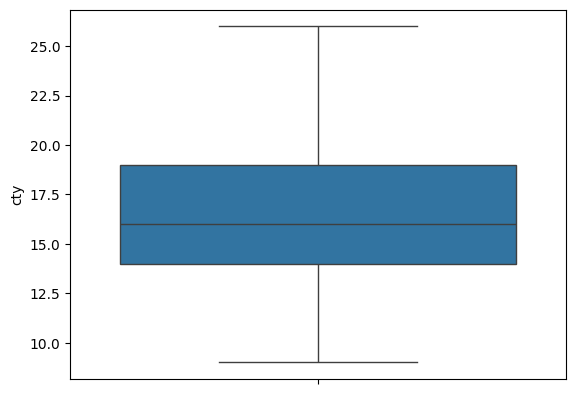

In [ ]:
# 상자 그림 다시 확인
sns.boxplot(data=mpg, y='cty') 

In [26]:
# 이상치 제거 후 -> drv별 cty의 평균
mpg.dropna(subset=['drv', 'cty']).groupby('drv').agg(mean_cty = ('cty', 'mean'))

,mean_cty
drv,
4,14.247423
f,19.470000
r,13.958333
